# 311 Systems report

### Clicking the soda link will just download you the relevant columns
[*311 complaint dataset*](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
[**311 Soda Download link**](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
). 
[*PLUTO dataset for housing*](https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf). 
 

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

### Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?



In [27]:
# Import librarys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap
fig = (10,10) 



In [28]:
# Import Data
df_1 = pd.read_csv("./fhrw-4uyv.csv", parse_dates=False)


### New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one.


In [29]:
# Combines complaint types 
df_1['complaint_type'] = np.where(df_1['complaint_type']=='HEATING','HEAT/HOT WATER',df_1['complaint_type'])
df_1["complaint_type"].value_counts()

HEAT/HOT WATER            2087533
PLUMBING                   707082
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       445325
PAINT - PLASTER            361257
PAINT/PLASTER              343931
ELECTRIC                   305464
NONCONST                   260890
DOOR/WINDOW                202785
WATER LEAK                 190955
GENERAL                    149116
FLOORING/STAIRS            136460
APPLIANCE                  111411
HPD Literature Request      52830
SAFETY                      50854
OUTSIDE BUILDING             7090
ELEVATOR                     6591
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

### Drop irrelevant information for answering and to help with processing, These are both near 99.9% the same

In [30]:
print(df_1["location_type"].value_counts())
print(df_1["address_type"].value_counts())

RESIDENTIAL BUILDING    5872718
Residential Building       7098
Apartment                     5
Building-Wide                 4
Public Area                   2
Name: location_type, dtype: int64
ADDRESS    5847884
Name: address_type, dtype: int64


### Below shows that the value count of open tickets leans towards construction being a bigger issue with general constuction being 1st and the others being lower. This is likely due to the time difference  from when this was originally put up as a project. Additionally, in the example they provide the instructor does not take open and closed tickets into account. 


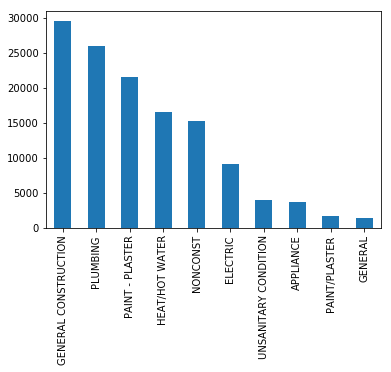

In [31]:
df_2 = df_1.loc[df_1['status'] == "Open"]
df_2["complaint_type"].value_counts().head(10).plot(kind='bar',x='Complaint Type',y='Amount')
plt.show()

### We can see that Location_type and Address_type are 100% Residental so they're unneeded in answering this question. We can see that status is considered irrelevant as we're told that it should be Heating/Hot Water which is only achievable if you ignore the open to closed ticket status. 

In [32]:
#We can see that location type is only resedential so this is not needed. 
unwanted_col = ['created_date',"unique_key",'resolution_description','closed_date',"location_type","status"]
df_1.drop(unwanted_col, axis=1, inplace = True)
df_1.head(5)

,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,longitude
0,PAINT/PLASTER,10032.0,900 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,MANHATTAN,40.838127,-73.946517
1,HEAT/HOT WATER,11206.0,435 BUSHWICK AVENUE,BUSHWICK AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.702428,-73.937188
2,ELECTRIC,11226.0,447 EAST 26 STREET,EAST 26 STREET,ADDRESS,BROOKLYN,BROOKLYN,40.639385,-73.952229
3,HEAT/HOT WATER,11218.0,569 CONEY ISLAND AVENUE,CONEY ISLAND AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.643414,-73.969980
4,WATER LEAK,10459.0,1107 BRYANT AVENUE,BRYANT AVENUE,ADDRESS,BRONX,BRONX,40.826453,-73.888833


### Ensure the correct Dtypes to help with processing for the information

In [33]:
print(df_1.dtypes)

complaint_type       object
incident_zip        float64
incident_address     object
street_name          object
address_type         object
city                 object
borough              object
latitude            float64
longitude           float64
dtype: object


In [34]:
print(df_1["city"].value_counts().head(10))


BROOKLYN         2001008
BRONX            1830479
NEW YORK         1185721
STATEN ISLAND     100528
Jamaica            64525
Astoria            42085
Flushing           42000
Far Rockaway       36130
Elmhurst           32433
JAMAICA            31815
Name: city, dtype: int64


### According to Wikipedia is all the boroughs/citys with in New York so there is no need to shrink the sample size to just the New York city - https://en.wikipedia.org/wiki/New_York_City

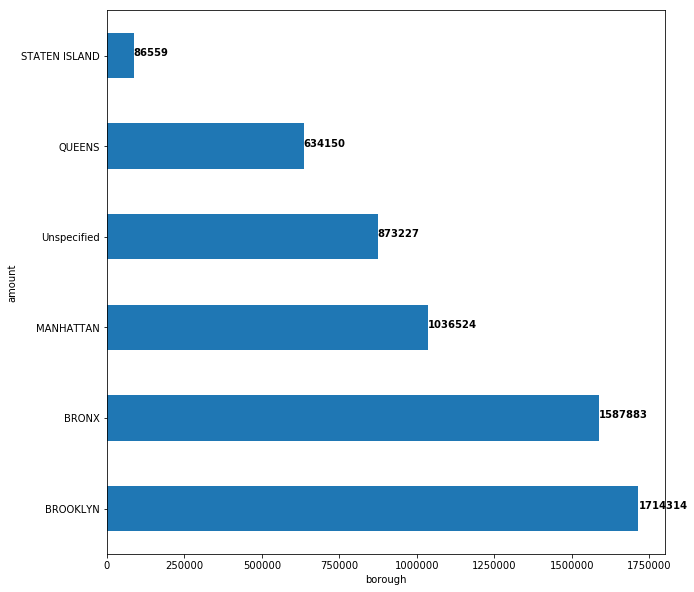

In [35]:
# Returns highest occuring areas
bor_val_count = df_1["borough"].value_counts()
plt.xlabel("borough")
plt.ylabel("amount")
bor_val_count.plot(kind='barh', figsize=fig)
for index, value in enumerate(bor_val_count):
    plt.text(value , index, str(value), color='black', fontweight='bold')

plt.show()

In [36]:
print(bor_val_count)

BROOKLYN         1714314
BRONX            1587883
MANHATTAN        1036524
Unspecified       873227
QUEENS            634150
STATEN ISLAND      86559
Name: borough, dtype: int64


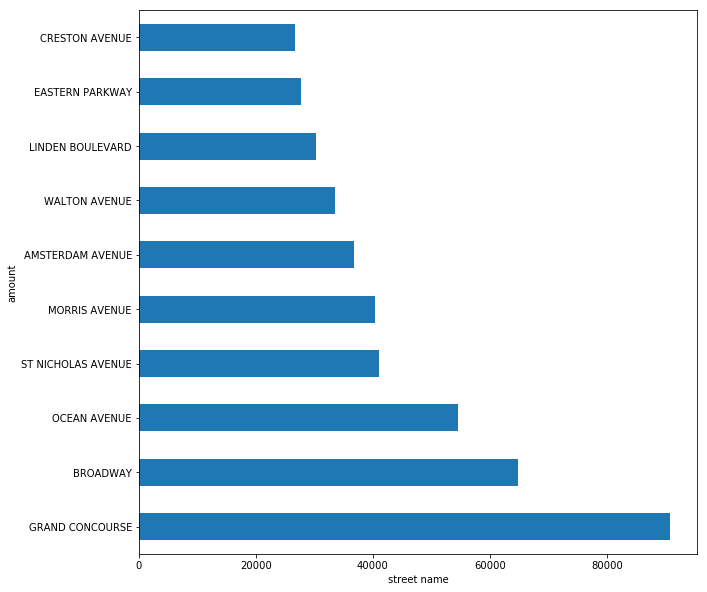

In [37]:
# Returns the highest occuring street names - most of these streets are the long running streets that run from the south of NY to the north which does not provide as much information as needed
plt.xlabel("street name")
plt.ylabel("amount")
df_1["street_name"].value_counts().head(10).plot(kind='barh', figsize=fig)
plt.show()

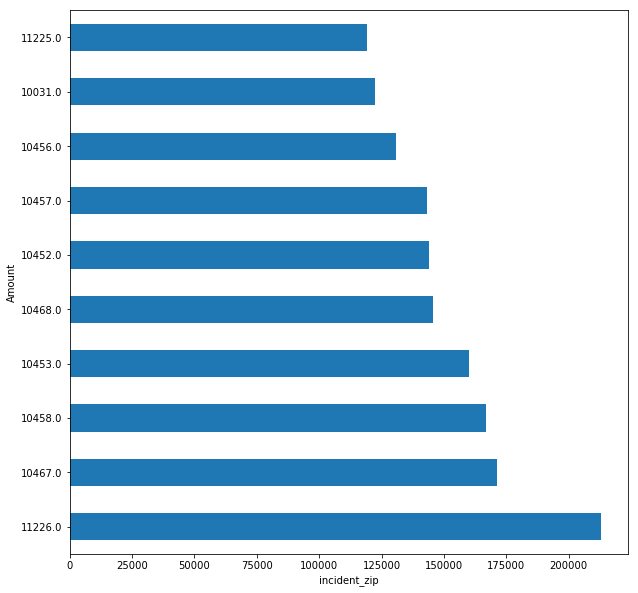

In [38]:
plt.xlabel("incident_zip")
plt.ylabel('Amount')
df_1["incident_zip"].value_counts().head(10).plot(kind='barh', figsize=fig)
# Returns the highest occuring zip codes shows that 7 of the top 10 are in the Bronx which re affirms what the boroughs showed (3rd mostly densly populated area in the USA - http://www.maphill.com/united-states/new-york/104/maps/political-shades-map/)
plt.show()

### As the boroughs at streets don't explain too much indivually though we can see the top 2 being Brooklyn & the Bronx. I'll seperate the two and see which are the highest occuring streets within the two broroughs and see if they have a close proximity

In [39]:
df_2 = df_1[df_1["borough"].isin(["BROOKLYN", "BRONX"])]
df_2["borough"].value_counts()

BROOKLYN    1714314
BRONX       1587883
Name: borough, dtype: int64

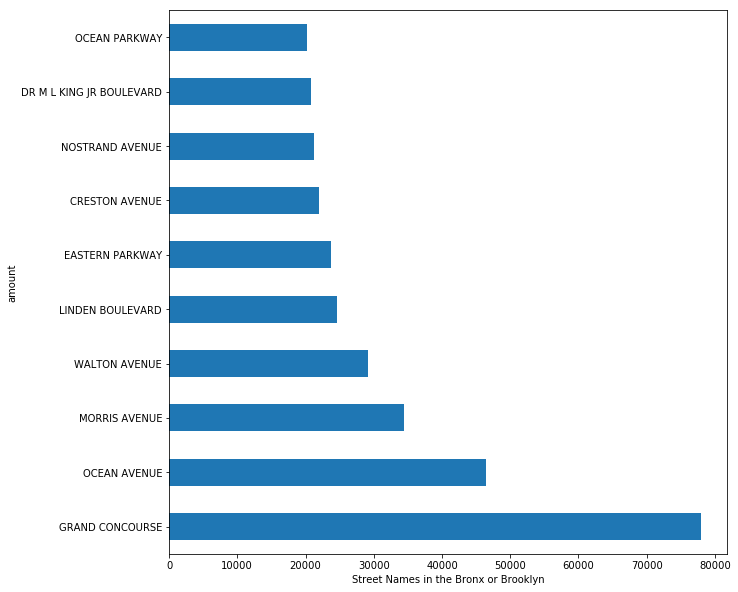

In [40]:
plt.xlabel("Street Names in the Bronx or Brooklyn")
plt.ylabel("amount")
df_2["street_name"].value_counts().head(10).plot(kind='barh', figsize=fig)
plt.show()

## When doing this we can see that the grand course is the highest occuring between both and its only a street in the bronx this leads us to belive that the grand concourse is the highest occuring street in the New York area which is also confirmed earlier when we checked street names without filtering

In [41]:
# For a heat map you can't have locations without latitude and longitude drop ones with NaN for the respective fields 
df_1 = df_1[(df_1["latitude"].notnull() | df_1["longitude"].notnull())]
print(df_1.shape)

(5852035, 9)


### There would be way too much appearing on the map when displaying all complaints so we'll only show the Heat/Hot Water issue this so we'll look at moving it down to just the heat/hot water. Addiitionally, Folium crashes after a certain point so we'll show Brooklyn as it's the highest occuring steets. I've left the other options commented out but you need to save them out and it just shows issues everywhere and not as insightful 

In [42]:
df_1 = df_1[df_1["complaint_type"] == "HEAT/HOT WATER"]
# There are too many values to display in the ide with folium without saving out. So we'll sort once more to just the grand course street and heat/hot water 
df_1.head(5)

,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,longitude
1,HEAT/HOT WATER,11206.0,435 BUSHWICK AVENUE,BUSHWICK AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.702428,-73.937188
3,HEAT/HOT WATER,11218.0,569 CONEY ISLAND AVENUE,CONEY ISLAND AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.643414,-73.969980
5,HEAT/HOT WATER,11237.0,180 IRVING AVENUE,IRVING AVENUE,ADDRESS,BROOKLYN,BROOKLYN,40.701760,-73.919217
6,HEAT/HOT WATER,11219.0,1541 68 STREET,68 STREET,ADDRESS,BROOKLYN,BROOKLYN,40.620917,-73.997785
7,HEAT/HOT WATER,11420.0,133-38 132 STREET,132 STREET,ADDRESS,South Ozone Park,QUEENS,40.668972,-73.806860


In [43]:
df_1.complaint_type.value_counts()

HEAT/HOT WATER    2068545
Name: complaint_type, dtype: int64

In [45]:
df_2 = df_1[df_1["street_name"] == "GRAND CONCOURSE"]
df_2.head(10)

,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,longitude
77,HEAT/HOT WATER,10456.0,1290 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.836549,-73.915700
122,HEAT/HOT WATER,10458.0,2664 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.866405,-73.894114
144,HEAT/HOT WATER,10458.0,2300 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.857608,-73.899836
271,HEAT/HOT WATER,10458.0,2300 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.857608,-73.899836
312,HEAT/HOT WATER,10451.0,750 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.822892,-73.924652
349,HEAT/HOT WATER,10452.0,1505 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.841216,-73.912614
367,HEAT/HOT WATER,10458.0,2720 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.867584,-73.893215
433,HEAT/HOT WATER,10468.0,2955 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.872514,-73.887534
480,HEAT/HOT WATER,10456.0,1290 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.836549,-73.915700
533,HEAT/HOT WATER,10468.0,2625 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,40.865154,-73.895088


In [46]:
bronx_heat = list(zip(df_2["latitude"],df_2["longitude"]))

In [0]:
# Prep data once more for lat and long full stack was too much information so limited to 10000 to help processing power
# df_brooklyn = df_1[df_1["borough"] == "BROOKLYN"]
#df_queens = df_3[df_3["borough"] == "MANHATTAN"]
# df_bronx = df_1[df_1["borough"] == "BRONX"]


In [0]:
# brooklyn_heat = list(zip(df_brooklyn["latitude"],df_brooklyn["longitude"]))
# queens_heat = list(zip(df_queens["latitude"],df_queens["longitude"]))
# bronx_heat = list(zip(df_bronx["latitude"],df_bronx["longitude"]))

In [47]:

# # Starting at a zoom of 9 shows nearly everywhere being extremly hot moving to 13 and the user has the ability to scroll
Bronx_heat_map = folium.Map(location=[40.783199, -73.962450], 
                    zoom_start=12,
                    tiles = "Stamen Toner"
                    )

HeatMap(bronx_heat).add_to(Bronx_heat_map)


In [49]:
Bronx_heat_map
# Zooming in and interacting is the most insightful

# 311 Systems Summary - concluding remarks

The most common non-emergency that i'd originally identified was General/Constructions as i'd removed the Closed tickets as they would be the ones that need to be identified. Afterwards, i saw that the quiz of the same section listed Heat/water and heating as the common issue i restructed and found by leaving the closed tickets we can actually reach the same conclusion as the quiz in which Heat/Water and Heating are the most after being condensonned and ignoring that there is multiple tickets closed and wouldn't be neccessary to answering which to address first.

General/Construction, Showed that the most common issues were in Manhattan and that the northern section around Saint Nicholas Park. For Water/Heat and Heating we can see that the common issue is around the Bronx & Brooklyn, when confirming with google we can see that they're in the top 10 most densily populated areas in America. The difference between Brooklyn and the Bronx was only 2% though this is equal to more than 30,000 but over a 10 year period is not as much. 

As density does not properly explain why there are more heat hot water issues in these area. I believe we'll need to check the information provided in the pluto dataset to see if the time of construction or if the issue is to do with wealth in the areas. My other hypothesis is that this will appear more in the winter as Heat and hot water will be more likely to be checked then due to the increasing cold. 

Zip Codes, City and Borough helped reafirm this belief. Though the highest zones occuring were for heat/hot water were as below: 

BROOKLYN         1714314

BRONX            1587883

MANHATTAN        1036524

Streets didn't deem as much information as the highest occuring were long running ones that ran though New York. So we scaled down to see the relevant streets in side Brooklyn and Bronx to see an association. But after filtering we can see that Grand Concourse, The Bronx, NY, USA is the highest occuring street within the two highest area and thus should be investigated with my other hypothesis 

2019 & 2020 doesnt show much improvement as articles show the same issue is at hand - https://thecity.nyc/2019/10/most-heat-and-hot-water-complaints-come-from-the-bronx.html